
### Creating data to view and fit



In [1]:
from sklearn.datasets import make_circles
n_samples = 1000
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [2]:
X.shape

(1000, 2)

In [3]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})

In [4]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


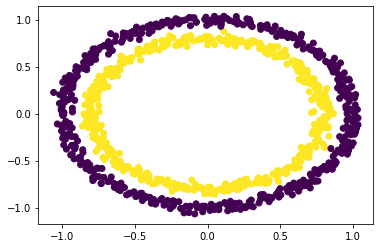

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[: , 1], c = y)

# Steps in modelings
  1. Create model
  2. Compile model
  3. Fit the model
  4. Evaluate the model

In [6]:
import tensorflow as tf


In [7]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
         tf.keras.layers.Dense(1)                     
])

model_1.compile(loss = tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_1.fit(X,y,epochs = 5)


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 0.7437 - accuracy: 0.4750
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.1855 - accuracy: 0.4960
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.1763 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.1740 - accuracy: 0.4920
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.5070


In [8]:
model_1.fit(X,y,epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.1735 - accuracy: 0.5000


[0.17345525324344635, 0.5]

# Improve

In [9]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
         tf.keras.layers.Dense(1),      
         tf.keras.layers.Dense(1)               
])

model_2.compile(loss = tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_2.fit(X,y,epochs = 100, verbose=0)


In [10]:
model_2.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 0.1734 - accuracy: 0.5000


[0.17341546714305878, 0.5]

# Improve the model by increse the layers as well as the number of hidden uints within a layer

In [11]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
         tf.keras.layers.Dense(100),      
         tf.keras.layers.Dense(10) , 
          tf.keras.layers.Dense(1) ,              
])

model_3.compile(loss = tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(X,y,epochs = 100, verbose=0)
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.5040


[0.17511941492557526, 0.5040000081062317]

# To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:
* Take in a trained model, feartures(X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where eacg unique class falls)

In [12]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  Plors the decision boundary created by a model predicting on X.
  This function was inspried by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://github.com/davydw/madewithML-basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    y_pred = np.argmax(y_pred,axis = 1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classification


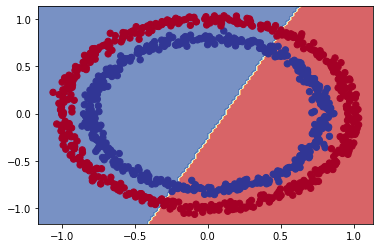

In [13]:
plot_decision_boundary(model_3, X,y)

# Missing piece: The none-linearity


In [14]:
#Set the random seed
tf.random.set_seed(42)
#1. Create the model
model_4 = tf.keras.Sequential([
         tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)                 
])

model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

history = model_4.fit(X,y, epochs=100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

doing binary classification


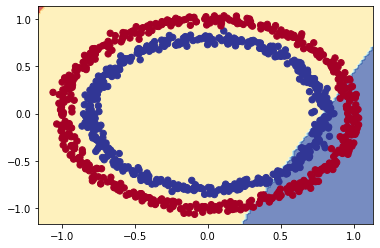

In [15]:
plot_decision_boundary(model_4, X,y)

In [16]:
#Set the random seed
tf.random.set_seed(42)
#1. Create the model
model_5 = tf.keras.Sequential([
         tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)                 
])

model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

history = model_5.fit(X,y, epochs=100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

doing binary classification


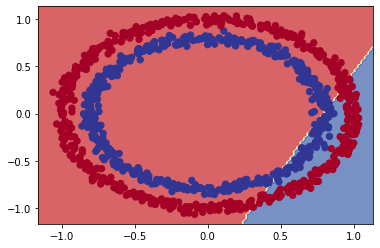

In [17]:
plot_decision_boundary(model_5, X,y)

In [18]:
#Set the random seed
tf.random.set_seed(42)
#1. Create the model
model_6 = tf.keras.Sequential([
         tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(1)                
                
])

model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

history = model_6.fit(X,y, epochs=250)


Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/250
32/32 [=

doing binary classification


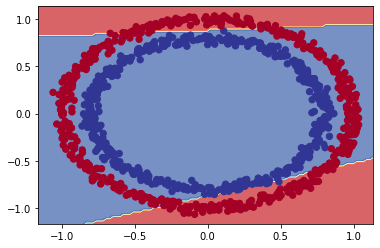

In [19]:
plot_decision_boundary(model_6, X,y)

In [20]:
#Set the random seed
tf.random.set_seed(42)
#1. Create the model
model_7 = tf.keras.Sequential([
         tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)                
                
])

model_7.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

history = model_7.fit(X,y, epochs=250)


Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/250
32/32 [=

doing binary classification


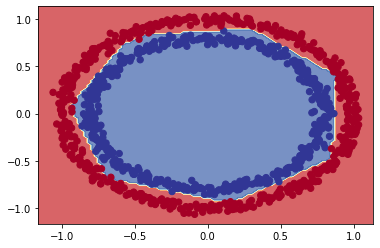

In [21]:
plot_decision_boundary(model_7, X,y)

# Activation function

In [22]:
A = tf.range(-10, 10,0.01, dtype= tf.float32)
A

<tf.Tensor: shape=(2000,), dtype=float32, numpy=
array([-10.      ,  -9.99    ,  -9.98    , ...,   9.970266,   9.980267,
         9.990267], dtype=float32)>

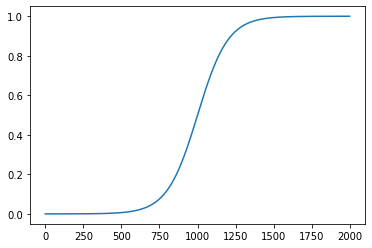

In [23]:
def sigmoid(x):
  return  1/(1 + tf.exp(-x))
plt.plot(sigmoid(A))

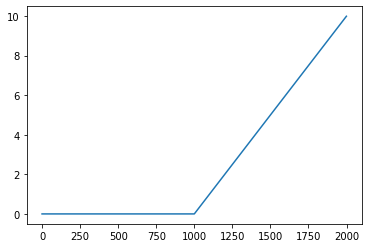

In [24]:
def relu(x):
  return  tf.maximum(0,x);
plt.plot(relu(A))

# Imporving our classification
So far we've been training and testing on the same dataset...
However, in machine learning this is basically a sin.
So let's create a training and test set



In [25]:
#Split into train and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [26]:
#Set the random seed
tf.random.set_seed(42)
#1. Create the model
model_8 = tf.keras.Sequential([
         tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)                
                
])

model_8.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics = ["accuracy"])

history = model_8.fit(X_train,y_train, epochs=25)


Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5337
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.5663
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6715 - accuracy: 0.5625
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.5838
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.5587
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.5813
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.6012
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.6150
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6111 - accuracy: 0.7163
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7638
Epoch 11/25
25/25 [===========

In [27]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9950


[0.08037362992763519, 0.9950000047683716]

doing binary classification
doing binary classification


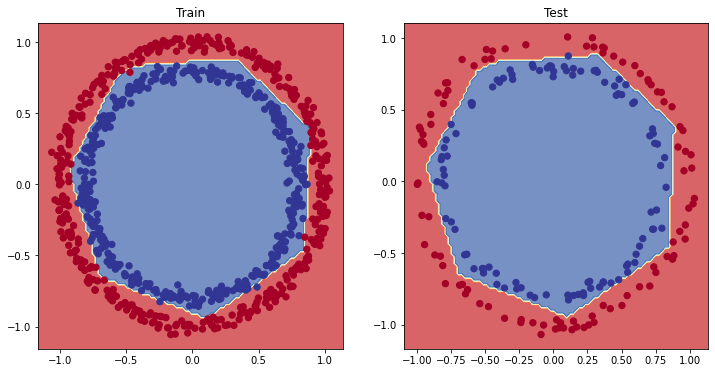

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X_test,y_test)
plt.show()

#Plot the loss

In [29]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684294,0.53375
1,0.676707,0.56625
2,0.671525,0.56250
3,0.666662,0.58375
4,0.660784,0.55875
5,0.654868,0.58125
6,0.646000,0.60125
7,0.632244,0.61500
8,0.611090,0.71625
9,0.581625,0.76375


Text(0.5, 1.0, 'Model_8 loss curve')

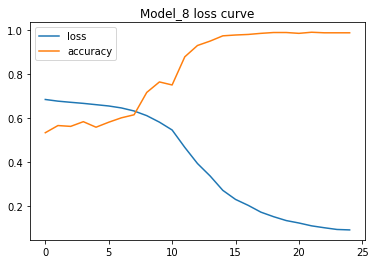

In [30]:
# Ploss the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curve')

## Finding the best learning rate
To find the ideal learning rate, we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training
* Anothre model (We could use the same one as above, but we're practicing building models here)
* A modified curves plot.

In [31]:
#Set the random seed
tf.random.set_seed(42)
#1. Create the model
model_9 = tf.keras.Sequential([
         tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)                
                
])

model_9.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


history_9 = model_9.fit(X_train,y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5025 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5025 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5038 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5038 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5150 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5075 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

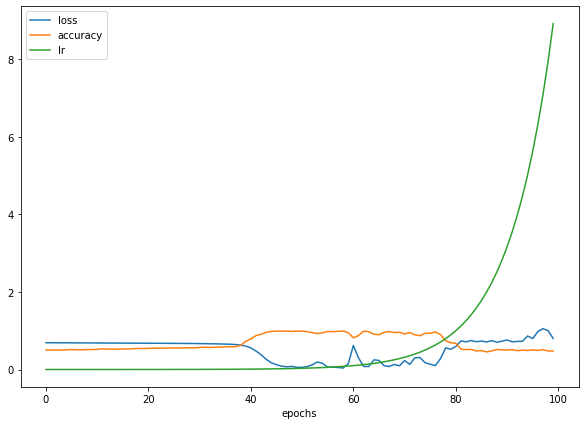

In [32]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

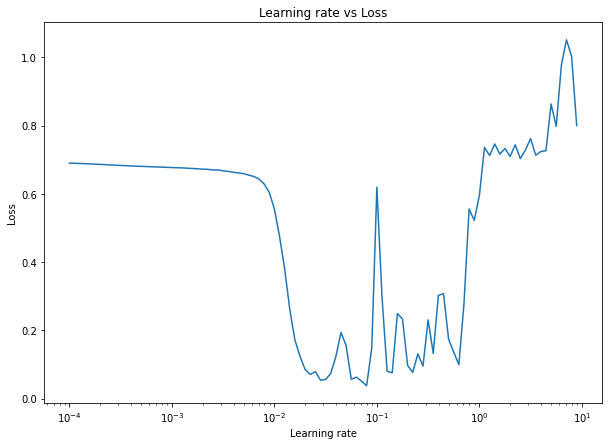

In [33]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [34]:
#Example of other typical learning rates values
10**0, 1e-1, 1e-2, 1e-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [35]:
#Let's try using a higher ideal learning rate with the same model

#Set the random seed
tf.random.set_seed(42)
#1. Create the model
model_10 = tf.keras.Sequential([
         tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)                
                
])

model_10.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=0.02),
                metrics = ["accuracy"])



history_10 = model_10.fit(X_train,y_train, epochs=20)


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5213
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.5600
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.5800
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.5913
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6125
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.7138
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.7025
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5147 - accuracy: 0.7275
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8487
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.9588
Epoch 11/20
25/25 [===========

In [36]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0872 - accuracy: 0.9800


[0.08721641451120377, 0.9800000190734863]

In [37]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9950


[0.08037362992763519, 0.9950000047683716]

doing binary classification
doing binary classification


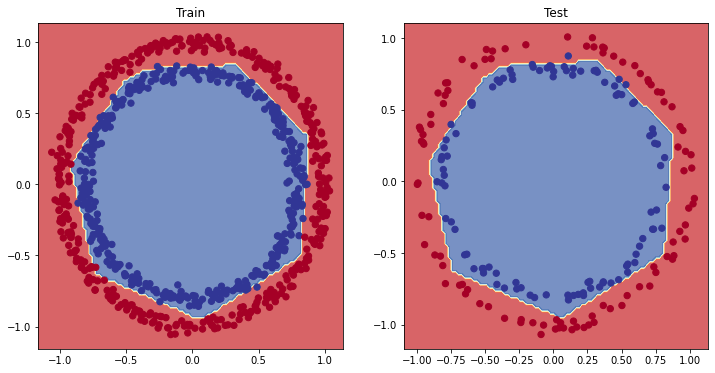

In [38]:
#plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X_test,y_test)
plt.show()

# How about a confusion matrix

In [39]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model_10.predict(X_test)
#Crate confusion matrix
confusion_matrix(y_test,tf.round(y_pred))

array([[98,  0],
       [ 4, 98]])

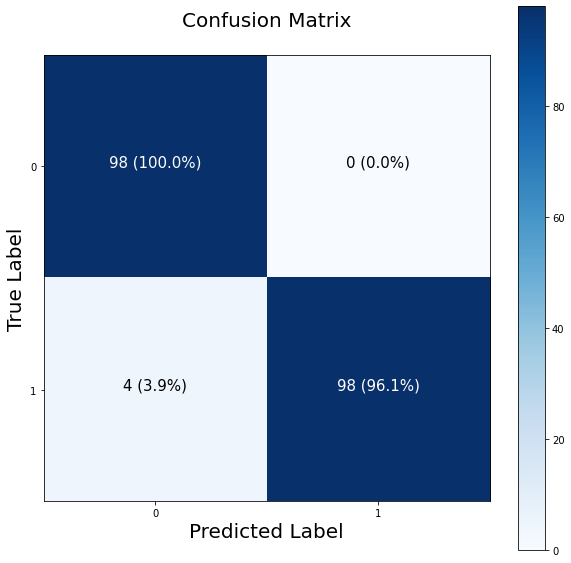

In [40]:
import itertools
figsize = (10,10)

#Create confusion matrix
cm = confusion_matrix(y_test,tf.round(y_pred))
cm_norm = cm.astype("float")  / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
#Create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)
#Create classes
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

  #Label the axes
  ax.set(title="Confusion Matrix",
         xlabel = "Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels = labels
         )
  
#Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = ((cm.max() + cm.min()) /2)

#Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)


In [41]:
cm_norm

array([[1.        , 0.        ],
       [0.03921569, 0.96078431]])

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tf.round(y_pred)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        98
           1       1.00      0.96      0.98       102

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



# Working with a larger example (multiclass classification)

In [43]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [44]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_name)

10

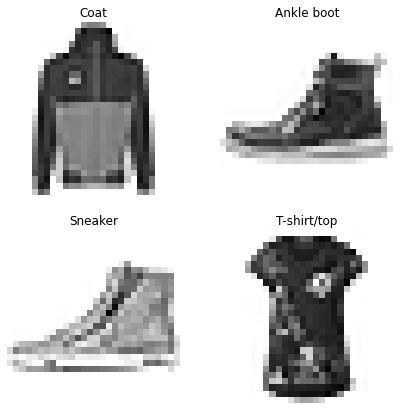

In [45]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_name[train_label[rand_index]])
  plt.axis(False)


# Building a multi-class classification model

In [46]:

#Set the random seed
tf.random.set_seed(42)
#1. Create the model
model_11 = tf.keras.Sequential([
         tf.keras.layers.Flatten(input_shape=(28,28)), 
         tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)                
                
])

model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.02),
                metrics = ["accuracy"])



history_11 = model_11.fit(train_data,train_label, epochs=10, validation_data=(test_data, test_label))


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 2.3454 - accuracy: 0.1006 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3054 - accuracy: 0.0989 - val_loss: 2.3069 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3055 - accuracy: 0.1000 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3053 - accuracy: 0.1008 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3052 - accuracy: 0.0994 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3050 - accuracy: 0.1003 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3053 - accuracy: 0.0996 - val_loss: 2.3043 - val_accuracy: 0.1000
Epo

In [47]:
train_data.min(), train_data.max()

(0, 255)

### Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensor between 0 and 1




In [48]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0


train_data_norm.min() , train_data_norm.max()

(0.0, 1.0)

In [49]:

#Set the random seed
tf.random.set_seed(42)
#1. Create the model
model_12 = tf.keras.Sequential([
         tf.keras.layers.Flatten(input_shape=(28,28)), 
         tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)                
                
])

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.02),
                metrics = ["accuracy"])



history_12 = model_12.fit(train_data_norm,train_label, epochs=10, validation_data=(test_data_norm, test_label))


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 1.4621 - accuracy: 0.3734 - val_loss: 1.2114 - val_accuracy: 0.5109
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0326 - accuracy: 0.5656 - val_loss: 0.9092 - val_accuracy: 0.6170
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9008 - accuracy: 0.6309 - val_loss: 0.8907 - val_accuracy: 0.6236
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8760 - accuracy: 0.6471 - val_loss: 0.9458 - val_accuracy: 0.6212
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8179 - accuracy: 0.6874 - val_loss: 0.8165 - val_accuracy: 0.6752
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7909 - accuracy: 0.7078 - val_loss: 0.8683 - val_accuracy: 0.6755
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7760 - accuracy: 0.7208 - val_loss: 0.7643 - val_accuracy: 0.7392
Epo

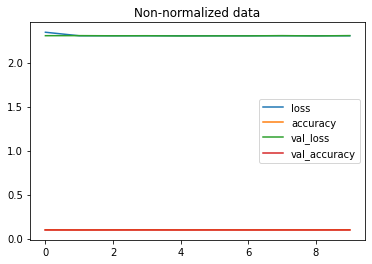

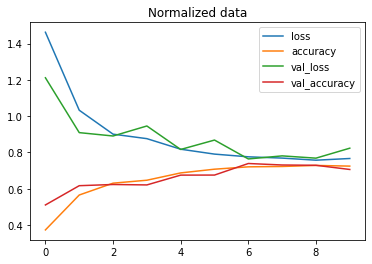

In [50]:
import pandas as pd
pd.DataFrame(history_11.history).plot(title="Non-normalized data")
pd.DataFrame(history_12.history).plot(title="Normalized data")

# Finding the ideal learning rate

In [51]:

#Set the random seed
tf.random.set_seed(42)
#1. Create the model
model_13 = tf.keras.Sequential([
         tf.keras.layers.Flatten(input_shape=(28,28)), 
         tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)                
                
])

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.02),
                metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


history_13 = model_13.fit(train_data_norm,train_label, epochs=40, validation_data=(test_data_norm, test_label), callbacks=[lr_scheduler])


Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step -

Text(0.5, 1.0, 'Learning rate vs Loss')

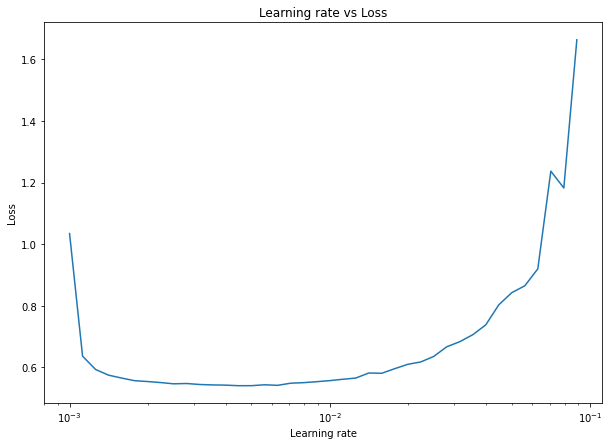

In [52]:
# Plot the learning rate versus the loss
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_13.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [53]:

#Set the random seed
tf.random.set_seed(42)
#1. Create the model
model_14 = tf.keras.Sequential([
         tf.keras.layers.Flatten(input_shape=(28,28)), 
         tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)                
                
])

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])



history_14 = model_14.fit(train_data_norm,train_label, epochs=20, validation_data=(test_data_norm, test_label))


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

In [54]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10,10), text_size=15):

  #Create confusion matrix
  cm = confusion_matrix(y_true,tf.round(y_pred))
  cm_norm = cm.astype("float")  / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  #Create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  #Set label to be classes
  classes = False
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

    #Label the axes
    ax.set(title="Confusion Matrix",
          xlabel = "Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels = labels
          )
    
  #Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = ((cm.max() + cm.min()) /2)

  #Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)


In [58]:
y_probs = model_14.predict(test_data_norm)
y_preds = y_probs.argmax(axis = 1)
confusion_matrix(test_label, y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

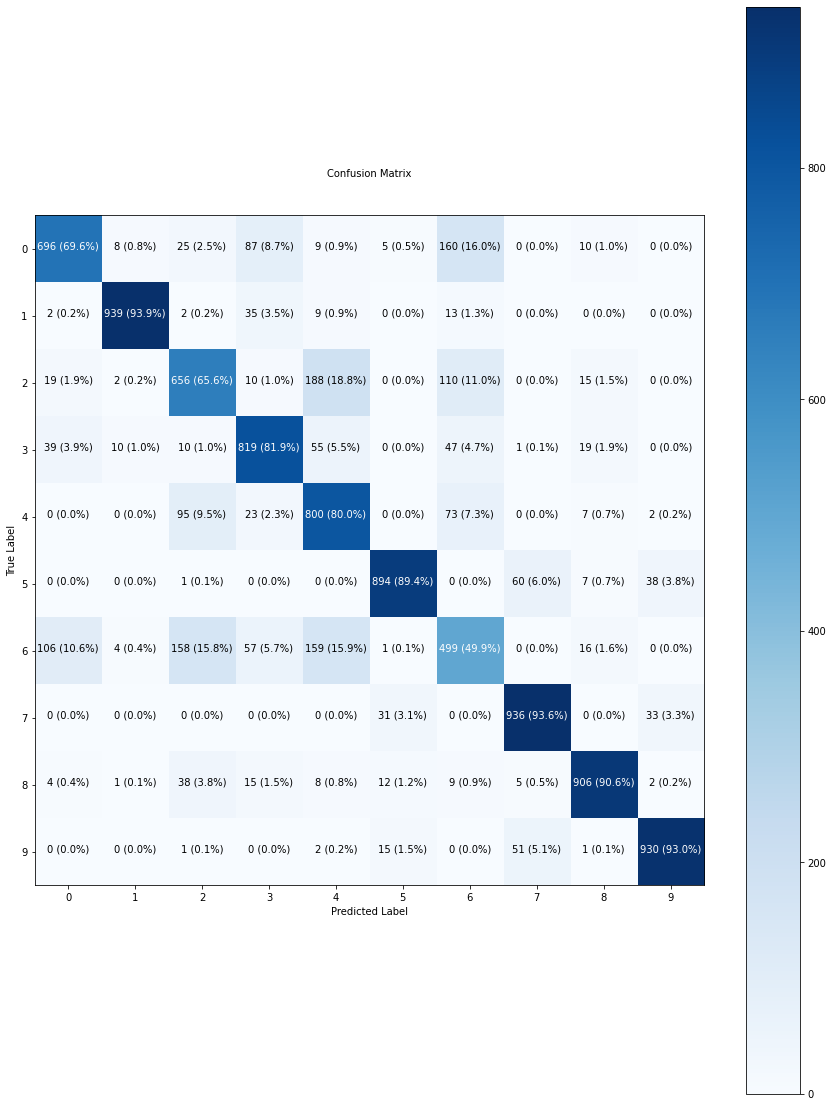

In [60]:
make_confusion_matrix(y_true=test_label, y_pred=y_preds, classes= class_name, figsize=(15,20), text_size=10)

In [61]:
import random
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]
  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label  == true_label:
    color = "green"
  else:
    color = "red"
  plt.xlabel("Pred: {} {:2.0f}% (True:{})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label),
             color=color)

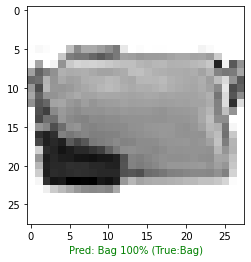

In [70]:
plot_random_image(model = model_14, 
                  images = test_data_norm,
                  true_labels=test_label,
                  classes = class_name)

# what patterns is our model learning ?


In [71]:
model_14.layers

In [74]:
 # Get the patterns of a layer in our network
 weights, biases = model_14.layers[1].get_weights()
 weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))